<a href="https://colab.research.google.com/github/Nielspace/Learning-DataScience/blob/master/Module%2002%20-%20Random%20Forest%20/%2002%20Deep_Dive_into_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing important libraries


In [0]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython import display
from io import StringIO

from fastai.imports import *


# Collecting Data

In [0]:

%cd drive/My\ Drive

/content/drive/My Drive


In [0]:
!ls

'c1 class 1 Exercise.txt'
'Colab Notebooks'
'convalutional neural network document.gdoc'
'Deep learning .gdoc'
 dogs-vs-cats-train-validadion-and-evaluation.zip
 fruit_cnn_model_1.h5
'How to get started with Drive.pdf'
'Linear Regression Part - 2 .ipynb'
 LinearSearch.py
 Project_ImageClassification_report.gdoc
 Resume.gdoc


In [0]:
%cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
!ls

' 02 Deep_Dive_into_Random_Forest.ipynb'
 blue-book-for-bulldozer.zip
 fifth_catdog_cnn.ipynb
 first_convolutional_neuralnetwork.ipynb
 forthcnn.ipynb
 GradiantDecent.ipynb
 Intro_to_Pytorch.ipynb
'Lesson 2 - Introduction to Pytorch with gradient descent.ipynb'
 Practiceing_graphs.ipynb
 Project_catsdogs_using_CNN_1410.ipynb
 project_dogscats.ipynb
 project_for_sale_prediction.ipynb
'Pytorch with gradient descent.ipynb'
 second_cnn_with_flask.ipynb
 Test.csv
 third_cnn.ipynb
 Titanic_with_RandomForr.ipynb
 Train
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled.ipynb
 Valid
"Week 02 Understanding the Concept - What's your pet.ipynb"
'Week 03 Image Classification using Keras 01.ipynb'
'Week 03 Image Classification using Keras 02.ipynb'


In [0]:
!unzip blue-book-for-bulldozer.zip

Archive:  blue-book-for-bulldozer.zip
replace Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Test.csv                
  inflating: Train/Train.csv         
  inflating: Valid/Valid.csv         


In [0]:
PATH = "Train/"

In [0]:
!ls {PATH}

Train.csv


In [0]:
data_raw = pd.read_csv(f'{PATH}Train.csv',low_memory=False, 
                     parse_dates=["saledate"] )

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [0]:
data_prac = data_raw.copy()

# Learning the Data

In [0]:
data_prac.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data_prac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

In [0]:
def assigning_categorical(data, column):
    categories = []
    for i in data[column].unique():
        categories.append(i)
    try:    
        categories.remove(np.nan)
    except Exception as e:
        pass
    data[column+'_new'] = pd.Categorical(data[column], categories=categories, ordered=True).codes
    data.drop(f'{column}', axis=1, inplace = True)
    data.replace(-1, np.nan, inplace=True)

In [0]:
for i in data_prac.columns:
    if data_prac[i].dtype == 'O':
        try:
            assigning_categorical(data_prac, i)
        except Exception as e:
            pass

In [0]:
data_prac['saleyear'] = data_prac['saledate'].dt.year
data_prac.drop('saledate', axis=1,inplace=True)

In [0]:
data_prac.SalePrice = np.log(data_prac.SalePrice)

In [0]:
for i in data_prac.columns:
    data_prac[i] = data_prac[i].fillna(data_prac[i].median())

In [0]:
X = data_prac.drop('SalePrice', axis=1)
y = data_prac.SalePrice

In [0]:
forr = RandomForestRegressor(n_jobs=-1)
forr.fit(X,y)
forr.score(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9817732450845598

# Creating Sets

In [0]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(X)-n_valid
raw_train, raw_valid = split_vals(data_prac, n_trn)
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 52), (389125,), (12000, 52))

# Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5513536884318444, 0.5727537785896839, 0.3646758053798844, 0.41415341861055127]


In [0]:
import graphviz
import IPython

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

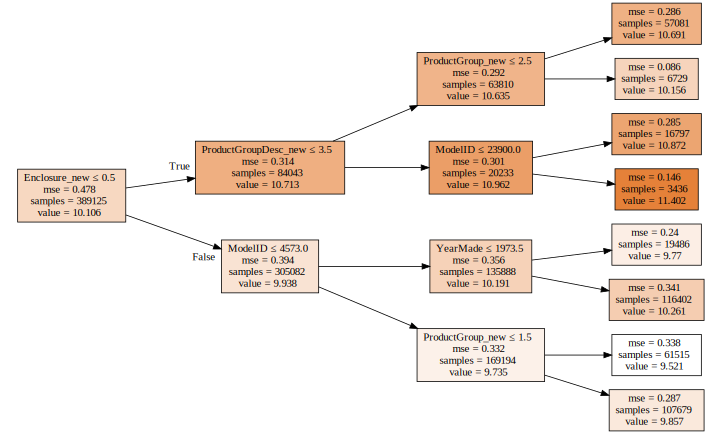

In [0]:
draw_tree(m.estimators_[0], X, precision=3)

Creating a bigger tree

In [0]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[9.128523288431049e-07, 0.37507134298925837, 0.9999999999982585, 0.7487675456967963]


# Bagging

## Intro to bagging

To learn about bagging in random forests, let's start with our basic model again.

In [0]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0933315390756768, 0.2586102173816824, 0.9817949581659106, 0.8805628772456311]


In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[:1]


(array([9.10497986, 9.25913054, 8.98719682, 8.9226583 , 9.10497986,
        9.10497986, 9.21034037, 9.21034037, 9.21034037, 9.21034037]),
 9.13252867131918,
 389125    9.10498
 Name: SalePrice, dtype: float64)

In [0]:
preds.shape

(10, 12000)

In [0]:
y_valid.shape

(12000,)

In [0]:
y_valid[0:1]

389125    9.10498
Name: SalePrice, dtype: float64

In [0]:
preds.shape

(10, 12000)

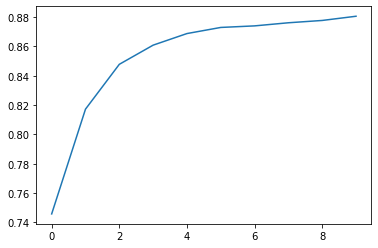

In [0]:
from sklearn.metrics import r2_score
plt.plot([r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [0]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.08528312756886786, 0.2463246186050254, 0.9847993883519859, 0.8916413434239283]


In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.08103365003702738, 0.24166318527409852, 0.9862764765406158, 0.8957036848272024]


In [0]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.07892860737236582, 0.23969685305787924, 0.9869802181873193, 0.8973940280697286]


# Out-of-bag (OOB) score
Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08101332756594921, 0.24168033838928193, 0.9862833591365799, 0.8956888785157102, 0.9021035322381753]


# Reducing over-fitting

## Subsampling

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [0]:
data_sample = data_prac.sample(20000)

In [0]:
len(data_sample)

20000

In [0]:
X = data_sample.drop('SalePrice', axis=1)
y = data_sample.SalePrice

In [0]:
X_train, X_valid = split_vals(X, 12000)
y_train, y_valid = split_vals(y, 12000)

X_train.shape, y_train.shape, X_valid.shape

((12000, 52), (12000,), (8000, 52))

In [0]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 1.69 s, sys: 1.9 ms, total: 1.69 s
Wall time: 943 ms
[0.13270001538889875, 0.31034240426460324, 0.9638921997610826, 0.8006578814587626, -1.453258871429191]


In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11496526187994922, 0.296318842198888, 0.9728985610373078, 0.8182663433931118, 0.8086737171194932]


# Tree building parameters

Playing with hyperparameters

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better

- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.16650944962726436, 0.2988912309913321, 0.9431491640176256, 0.8150973326604833, 0.8091452705030624]


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. We do this by specifying max_features, which is the proportion of features to randomly select from at each split.
- None
- 0.5
- 'sqrt'
- 1, 3, 5, 10, 25, 100

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.17608544538205403, 0.29648719689791825, 0.9364221254621936, 0.8180597793665273, 0.8111987635828175]


In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11360077723120854, 0.2947529404683533, 0.9735380594060055, 0.8201820171940638, 0.810448546222198]


In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, max_features=0.5, n_jobs=-1, oob_score=True)
%prun m.fit(X_train, y_train)
print_score(m)

 [0.14726928097231945, 0.2937549186034913, 0.9555283321363798, 0.8213976688658833, 0.8109660554220943]


In [0]:
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=50, max_features=0.5, n_jobs=-1, oob_score=True)
%prun m.fit(X_train, y_train)
print_score(m)

 [0.35878558520229975, 0.3760453276190067, 0.7360455080792119, 0.7073171855146929, 0.7033427927592393]


In [0]:
import pickle

In [0]:
pickle.dump(m,open('Rfweights.pkl','wb'))

In [0]:
y_train[:10]

178522    11.156251
283305     9.104980
287765     9.472705
151173    11.050890
4711       9.928180
110753    10.491274
77512      9.305651
69080     10.571317
122350    11.156251
324554    10.645425
Name: SalePrice, dtype: float64